In [37]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

In [38]:
max_features = 20000
maxlen = 80
batch_size = 32

In [39]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [40]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [41]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Build model...
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [45]:
print('Train...')
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2, callbacks=[es])

Train...
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1205 - acc: 0.9561 - val_loss: 0.1155 - val_acc: 0.9560
Epoch 2/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.1051 - acc: 0.9638 - val_loss: 0.1243 - val_acc: 0.9518
Epoch 3/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.0914 - acc: 0.9693 - val_loss: 0.1431 - val_acc: 0.9474


In [46]:
score, acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test Score:', score)
print('Test Accuracy:', acc)

25000/25000 [==============================] - 17s 668us/step
Test Score: 0.5055447645401955
Test Accuracy: 0.8336799740791321


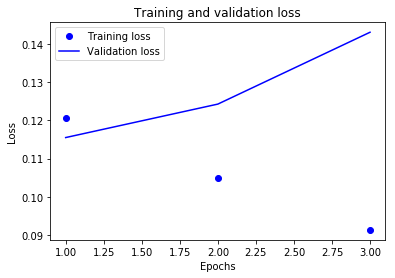

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()